In [75]:
from IPython import get_ipython  #This should allow exported .py file to run as python script
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
allresults = pd.read_csv('./results/allresults.csv') 

athletenodes = allresults[['firstname','lastname','yearborn','racecode','Year']] 
racenodes = allresults[['firstname','lastname','yearborn','racecode','Year']] 
#athletenodes.loc[:,'athlete'] = athletenodes['firstname']+athletenodes['lastname']+athletenodes['yearborn'].astype(str)
#athletegraph_df = athletenodes.merge(athletenodes,how='inner',on=['racecode','Year']) 
racenodes.loc[:,'race'] = racenodes['racecode']+racenodes['Year'].astype(str)
racegraph_df = racenodes.merge(racenodes,how='inner',on=['firstname','lastname','yearborn']) 
racegraph_df.head()

,firstname,lastname,yearborn,racecode_x,Year_x,race_x,racecode_y,Year_y,race_y
0,TRENTON,TOLLAKSON,1980,CH,2004,CH2004,CH,2004,CH2004
1,ANDREW,STARYKOWICZ,1982,CH,2004,CH2004,CH,2004,CH2004
2,ANDREW,STARYKOWICZ,1982,CH,2004,CH2004,CH,2005,CH2005
3,ANDREW,STARYKOWICZ,1982,CH,2005,CH2005,CH,2004,CH2004
4,ANDREW,STARYKOWICZ,1982,CH,2005,CH2005,CH,2005,CH2005


In [77]:
racegraph_series_wt = racegraph_df.groupby(['race_x','race_y'])['firstname'].count()
racegraph_df_wt = racegraph_series_wt.reset_index()
racegraph_df_wt.columns = ['race_x','race_y','weight']
racegraph_df_wt.head()

,race_x,race_y,weight
0,CH2004,CH2004,3469
1,CH2004,CH2005,1024
2,CH2004,CH2008,214
3,CH2004,CH2009,164
4,CH2004,CH2010,140


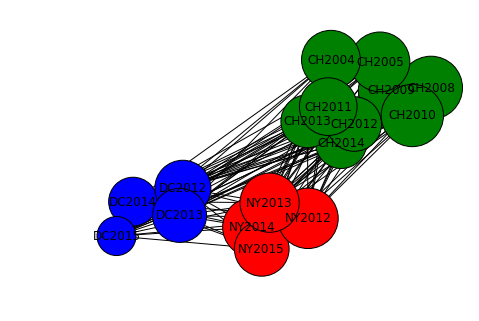

In [78]:
nodecolordict = {'CH': 'green',
              'DC': 'blue',
              'NY': 'red'}

racegraph = nx.from_pandas_dataframe(racegraph_df_wt, 'race_x', 'race_y', edge_attr=True)
node_color = [nodecolordict[node[0:2]] for node in racegraph]
node_size = [racegraph_df_wt.loc[(racegraph_df_wt['race_x']==node) & (racegraph_df_wt['race_y']==node)]['weight'].values[0] for node in racegraph]

#pos = nx.spring_layout(racegraph)
nx.draw(racegraph, node_color=node_color, node_size=node_size, with_labels=True)

#nx.draw_networkx_labels(racegraph,pos)
plt.show()

In [79]:
nx.degree(racegraph)


{'CH2004': 18,
 'CH2005': 18,
 'CH2008': 18,
 'CH2009': 18,
 'CH2010': 18,
 'CH2011': 18,
 'CH2012': 18,
 'CH2013': 18,
 'CH2014': 18,
 'DC2012': 18,
 'DC2013': 18,
 'DC2014': 18,
 'DC2015': 18,
 'NY2012': 18,
 'NY2013': 18,
 'NY2014': 18,
 'NY2015': 18}